## QuickLook at BOSS Spectra Meta Data

This notebook takes a look at the distribution of metadata and can be used to cross check the metadata compiled in boss_meta_rich.pkl created using boss_meta_rich.py

In [1]:
%matplotlib inline
import pickle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation
from astropy.time import Time
import datetime
from astropy.io import fits

In [2]:
from matplotlib.font_manager import FontProperties
font = FontProperties()
font.set_family('serif')
font.set_size('large')

### Good Meta Data

This is the subset of all spectra with QUALITY == 'good'

In [3]:
hdu = fits.open('good_meta_rich.fits')
meta_rich = hdu[1].data

In [6]:
print("Number of good plates: ", len(np.unique(meta_rich['PLATE'])))
print("Number of good observations: ", len(np.unique(meta_rich['IMG'])))

Number of good plates:  2435
Number of good observations:  9823


In [50]:
plates = np.unique(meta_rich['PLATE'])

In [33]:
num_data = []
for plate in np.unique(meta_rich['PLATE']):
    plate_data = meta_rich[meta_rich['PLATE'] == plate]
    b1 = np.unique(plate_data[plate_data['CAMERAS']==b'b1']['FIB'])
    b2 = np.unique(plate_data[plate_data['CAMERAS']==b'b2']['FIB'])
    imgs = np.unique(plate_data['IMG'])
    num_data.append([len(imgs),len(b1),len(b2),len(b1)+len(b2)])

In [34]:
num_data = np.array(num_data)

In [42]:
ss = num_data[:,3]

In [51]:
plates[ss>80]

array([3587, 3588, 3590, ..., 7563, 7564, 7565], dtype=int32)

In [9]:
import pandas as pd

In [60]:
plate_meta = meta_rich[meta_rich['PLATE'] == 7563]
df = pd.DataFrame(plate_meta)

In [61]:
imgs = np.unique(df['IMG'])

In [62]:
for i, img in enumerate(imgs):
    b1 = df[(df['IMG'] == imgs[i])&(df['CAMERAS']==b'b1')]
    b2 = df[(df['IMG'] == imgs[i])&(df['CAMERAS']==b'b2')]
    r1 = df[(df['IMG'] == imgs[i])&(df['CAMERAS']==b'r1')]
    r2 = df[(df['IMG'] == imgs[i])&(df['CAMERAS']==b'r2')]
    print(img, len(b1), len(b2), len(b1)+len(b2))

180493 168 106 274
180494 168 106 274
180495 168 106 274


In [63]:
one = df[(df['IMG'] == imgs[0])&(df['CAMERAS']==b'b1')]['FIB']
two = df[(df['IMG'] == imgs[1])&(df['CAMERAS']==b'b1')]['FIB']

In [68]:
np.sum(num_data[:,0]*num_data[:,3])

941258

### Get Dark Meta

In [7]:
dark_meta = meta_rich[(meta_rich['AIRMASS'] <= 1.4)&(meta_rich['GAL_LAT'] > 10)&(meta_rich['MOON_ALT'] < -18)]

## Cross Check Data

This can be used to cross check against other's meta data

In [7]:
#INPUTS:
ra = 7.947569
dec = 19.996900

In [8]:
xcheck_data = meta_rich[(meta_rich['RA'] == ra) & (meta_rich['DEC'] == dec)]

In [9]:
xcheck_data[0]

(6187, 0, 150697, 10, 294.45477294921875, -57.526641845703125, 9.381052017211914, 19.727018356323242, 56244.0, 4859498853.0, 4859499753.85, 7.947569, 19.9969, b'b1', 1.046180009841919, 74.229, -39.032, 900.8499755859375, 1.2422000169754028, 1.3586000204086304, 1.416100025177002, 2.299999952316284, -24.799999237060547, 3080.0, 90.0, 221.8000030517578, 5.599999904632568, 155.5, 17.299999237060547, 17.399999618530273, 21.591999053955078, 171.0, 13.600000381469727, -0.021723635494709015, 346.0793151855469, -0.012297193519771099, 280.69183349609375, -66.3814468383789, 308.1742248535156, -59.20874786376953, 291.1172790527344, 364688.1947778287, 151.64533109043927, 10.532104670878145, 141.60634120168453, 15.415960311889648, 15.193840026855469, 15.333150863647461, -42.63518142700195, 116.65289306640625, 219.01258850097656, 0.29176032543182373, 6, 5, 145.76666259765625, 'good', 294.45477, -57.526641, 6528.0)

## Distribution of Data

In [9]:
def plot_hist(name):
    plt.hist(meta_rich[name], bins=100, color='skyblue')
    plt.hist(dark_meta[name], bins=100, color='red')
    plt.yticks(font_properties=font)
    plt.xticks(font_properties=font)
    plt.title(name, font_properties=font)

In [10]:
def get_year_from_mjd(mjd):
    tt = Time(mjd, format='mjd')
    return tt.decimalyear

In [11]:
yeardate = get_year_from_mjd(meta_rich['MJD'])
dark_yeardata = get_year_from_mjd(dark_meta['MJD'])

In [12]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

(2010, 2014.5)

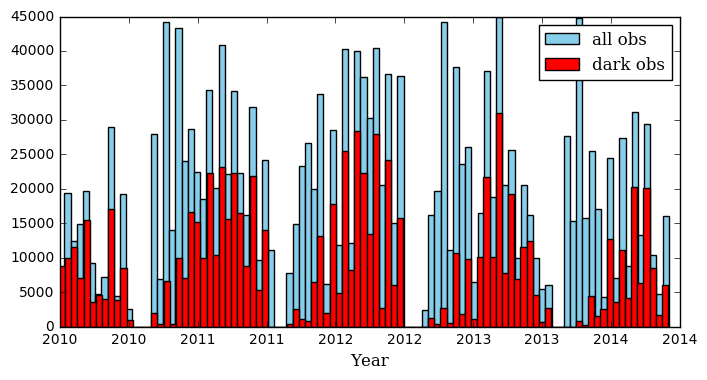

In [13]:
fig, ax1 = plt.subplots(figsize=[8,4])
ax1.hist(yeardate,bins=100,color='skyblue',label='all obs')
ax1.hist(dark_yeardata,bins=100,color='red',label='dark obs')
#plt.title("Solar Flux data (avg. per MJD)",fontproperties=font)
#ax1.set_xticklabels(fonproperties=font)
#ax1.set_yticks(fontproperties=font)
ax1.set_xlabel("Year",fontproperties=font)
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.legend(prop=font)
ax1.set_xlim([2010,2014.5])

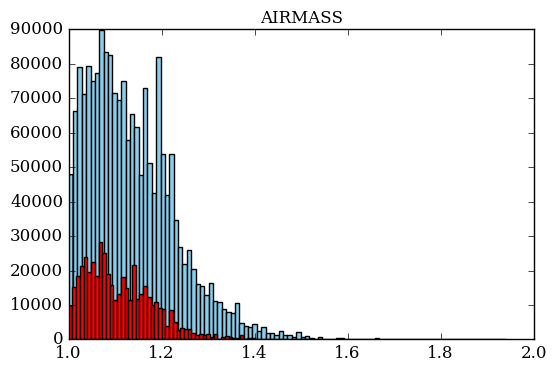

In [36]:
name='AIRMASS'
plt.hist(meta_rich[name], bins=100, color='skyblue')
plt.hist(dark_meta[name], bins=50, color='red')
plt.yticks(font_properties=font)
plt.xticks(font_properties=font)
plt.title(name, font_properties=font)

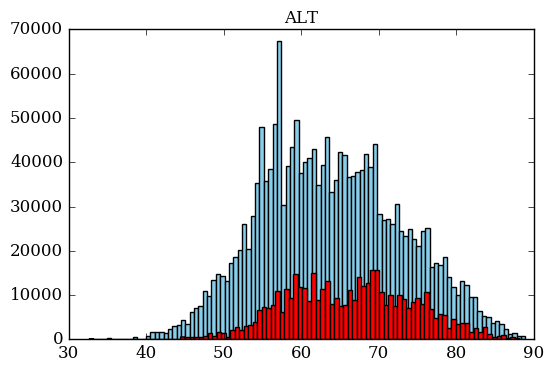

In [44]:
name='ALT'
plt.hist(meta_rich[name], bins=100, color='skyblue')
plt.hist(dark_meta[name], bins=75, color='red')
plt.yticks(font_properties=font)
plt.xticks(font_properties=font)
plt.title(name, font_properties=font)

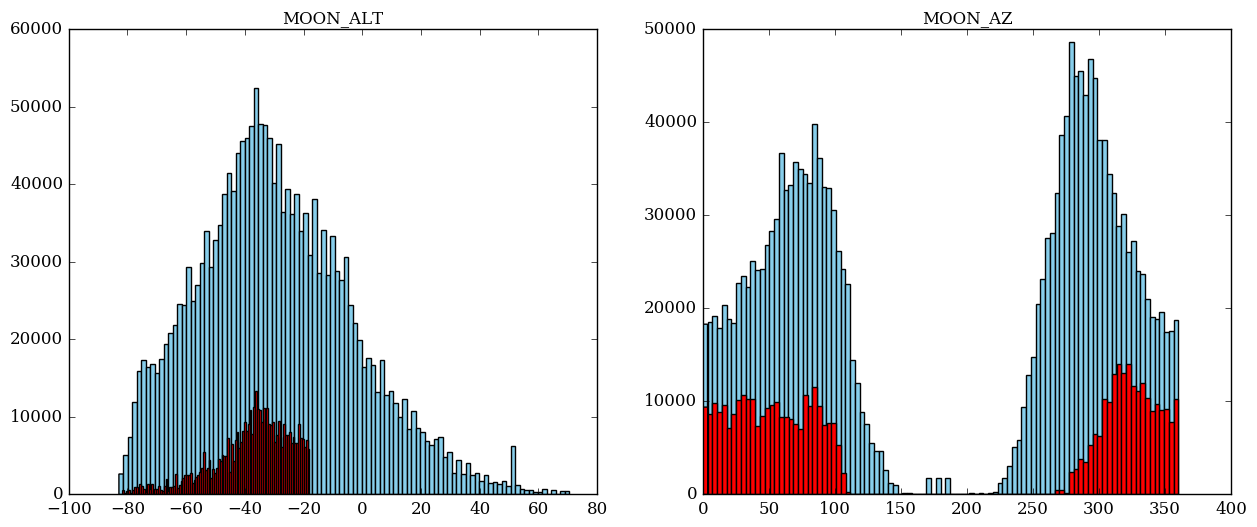

In [39]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plot_hist('MOON_ALT')
plt.subplot(1,2,2)
plot_hist('MOON_AZ')

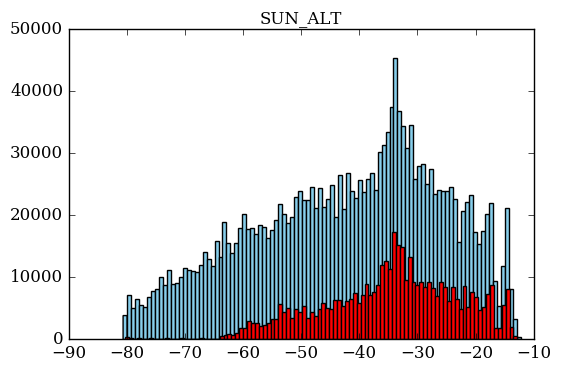

In [40]:
plot_hist('SUN_ALT')

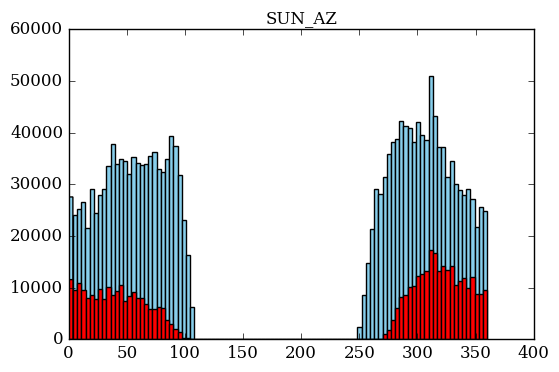

In [41]:
plot_hist('SUN_AZ')

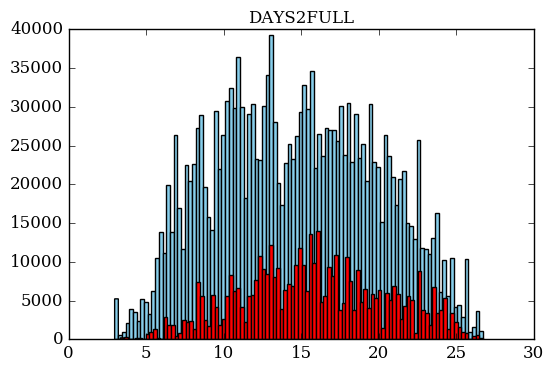

In [42]:
plot_hist('DAYS2FULL')

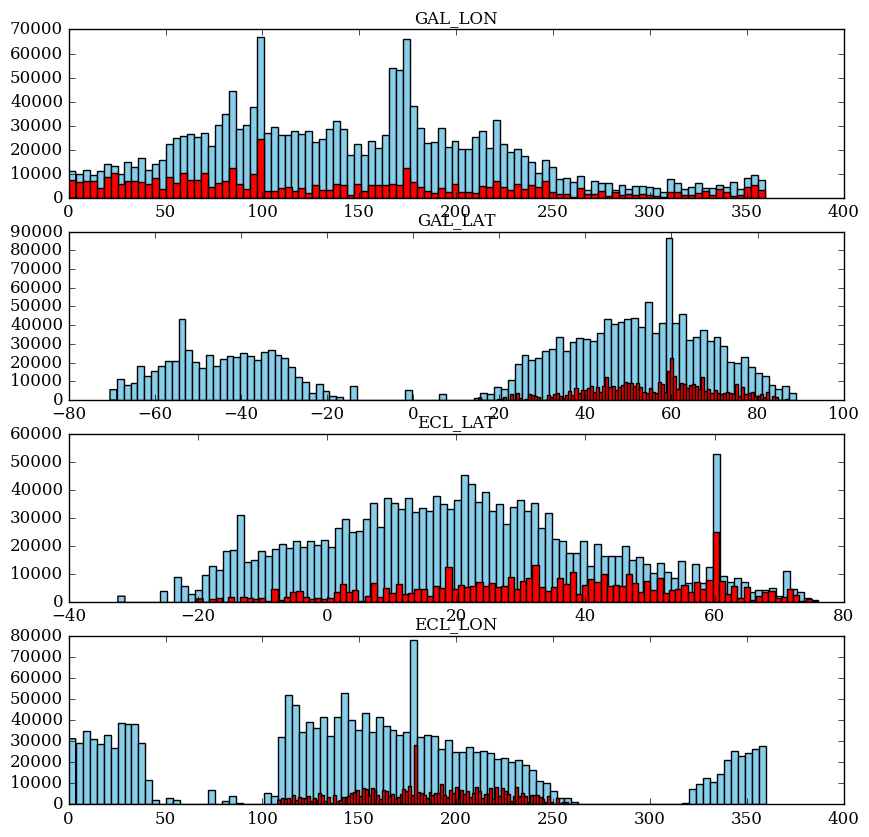

In [43]:
plt.figure(figsize=[10,10])
plt.subplot(4,1,1)
plot_hist("GAL_LON")
plt.subplot(4,1,2)
plot_hist("GAL_LAT")
plt.subplot(4,1,3)
plot_hist('ECL_LAT')
plt.subplot(4,1,4)
plot_hist('ECL_LON')

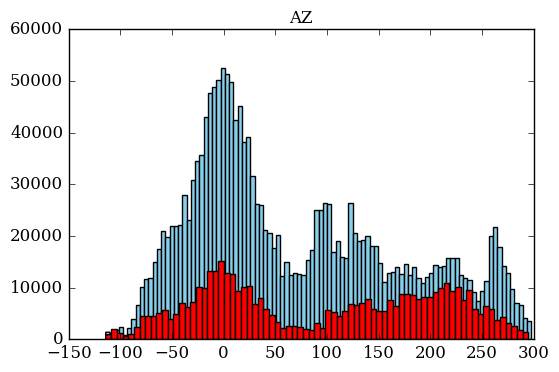

In [45]:
name='AZ'
plt.hist(meta_rich[name], bins=100, color='skyblue')
plt.hist(dark_meta[name], bins=75, color='red')
plt.yticks(font_properties=font)
plt.xticks(font_properties=font)
plt.title(name, font_properties=font)

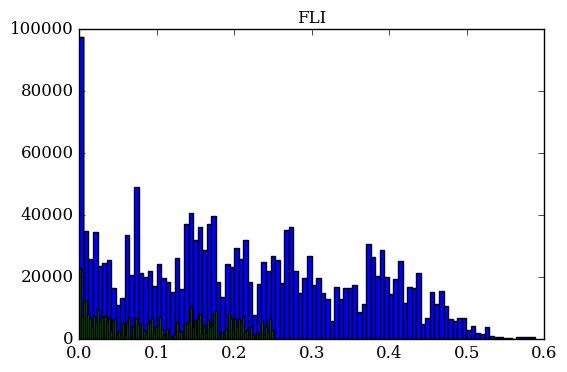

In [20]:
plot_hist('FLI')

In [47]:
SOLAR_FILE = 'ftp://ftp.geolab.nrcan.gc.ca/data/solar_flux/daily_flux_values/fluxtable.txt'
SUN_FLUX_DATA = pd.read_csv(SOLAR_FILE, header=0, delim_whitespace=True)
Solar_Flux = SUN_FLUX_DATA.drop(SUN_FLUX_DATA.index[0])
Solar_Flux = pd.DataFrame(Solar_Flux, dtype=float)

In [48]:
from datetime import datetime
def get_mjd_from_fluxtime(date):
    str_date = str(date)
    t = datetime(int(str_date[0:4]),int(str_date[4:6]),int(str_date[6:8]))
    tt = Time(t)
    return tt.decimalyear
def get_year_from_mjd(mjd):
    tt = Time(mjd, format='mjd')
    return tt.decimalyear

In [49]:
Solar_Flux['DYEAR'] = Solar_Flux.fluxdate.apply(get_mjd_from_fluxtime)
meta_year = get_year_from_mjd(meta_rich['MJD'])
dark_year = get_year_from_mjd(dark_meta['MJD'])

(0, 1000)

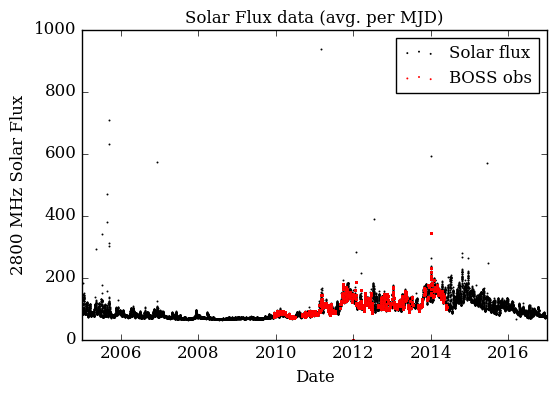

In [54]:
plt.scatter(Solar_Flux['DYEAR'], Solar_Flux['fluxobsflux'],color='k', lw=0, s=2.,label = 'Solar flux')
plt.scatter(meta_year, meta_rich['SOLARFLUX'],color='r',lw=0, s=2.,label='BOSS obs')
#plt.plot(dark_year,dark_meta['SOLARFLUX'],'b.',label='dark obs')
plt.title("Solar Flux data (avg. per MJD)",fontproperties=font)
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.xlabel("Date",fontproperties=font)
plt.ylabel("2800 MHz Solar Flux",fontproperties=font)
plt.legend(loc=1,prop=font)
plt.xlim([2005,2017])
plt.ylim([0,1000])

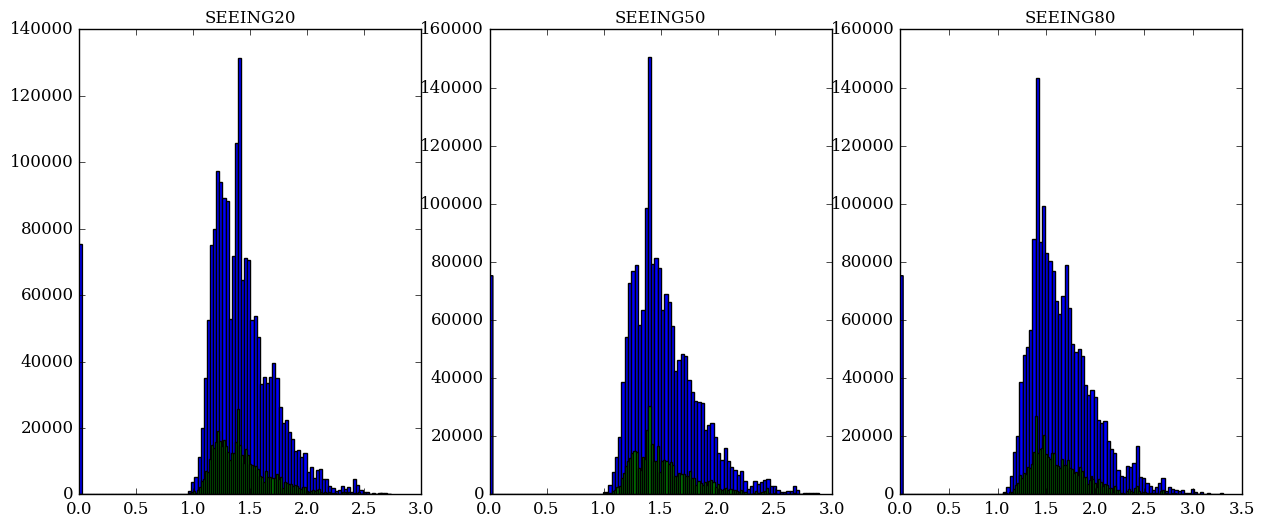

In [25]:
plt.figure(figsize=[15,6])
plt.subplot(1,3,1)
plot_hist('SEEING20')
plt.subplot(1,3,2)
plot_hist('SEEING50')
plt.subplot(1,3,3)
plot_hist('SEEING80')

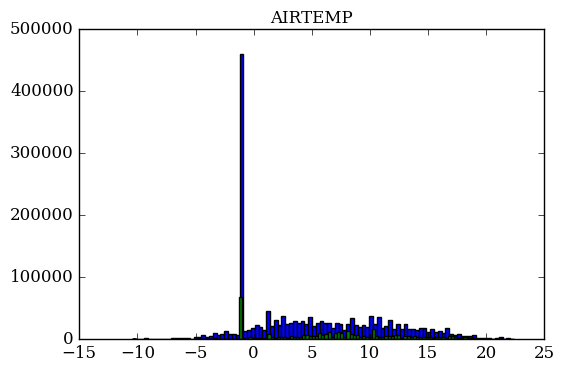

In [26]:
plot_hist('AIRTEMP')

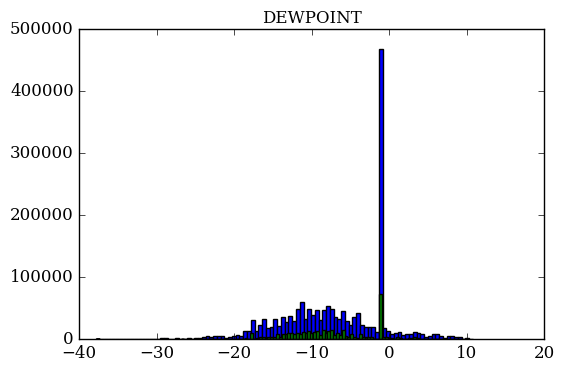

In [27]:
plot_hist('DEWPOINT')

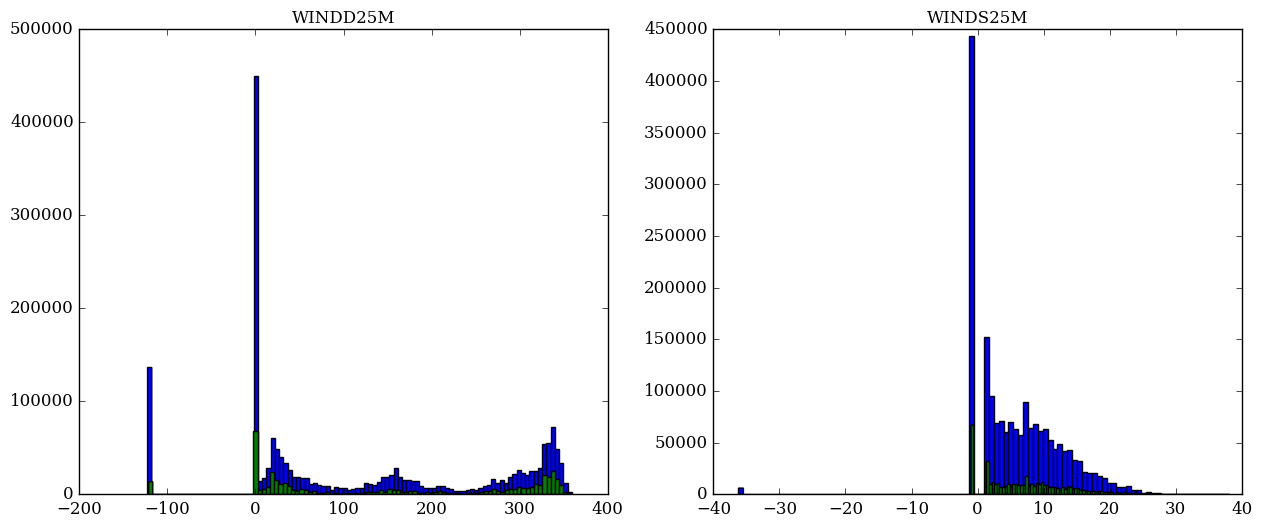

In [29]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plot_hist('WINDD25M')
plt.subplot(1,2,2)
plot_hist('WINDS25M')

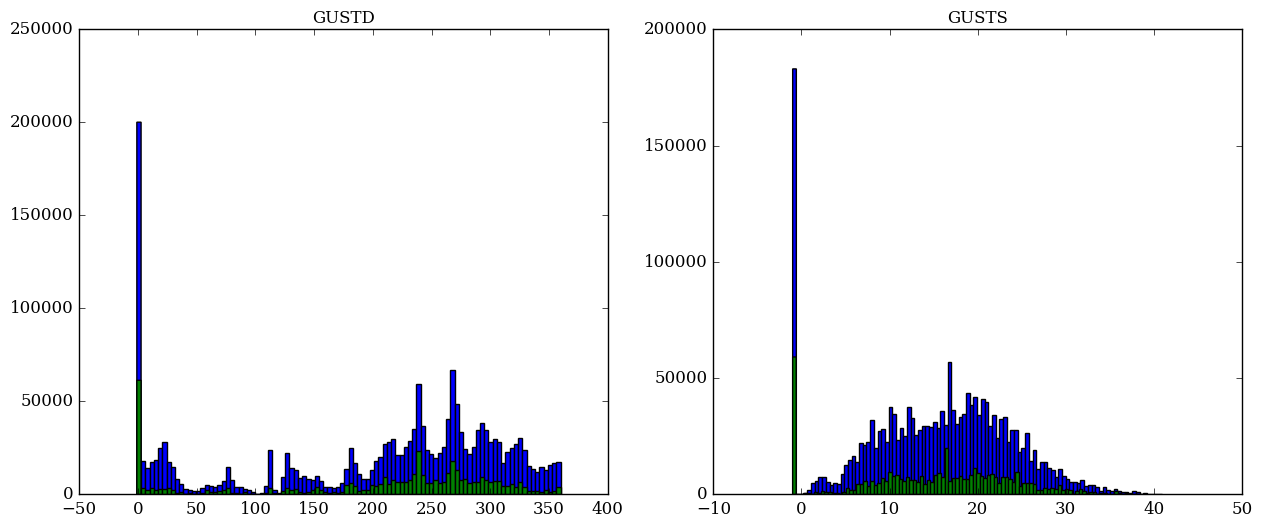

In [30]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plot_hist('GUSTD')
plt.subplot(1,2,2)
plot_hist('GUSTS')

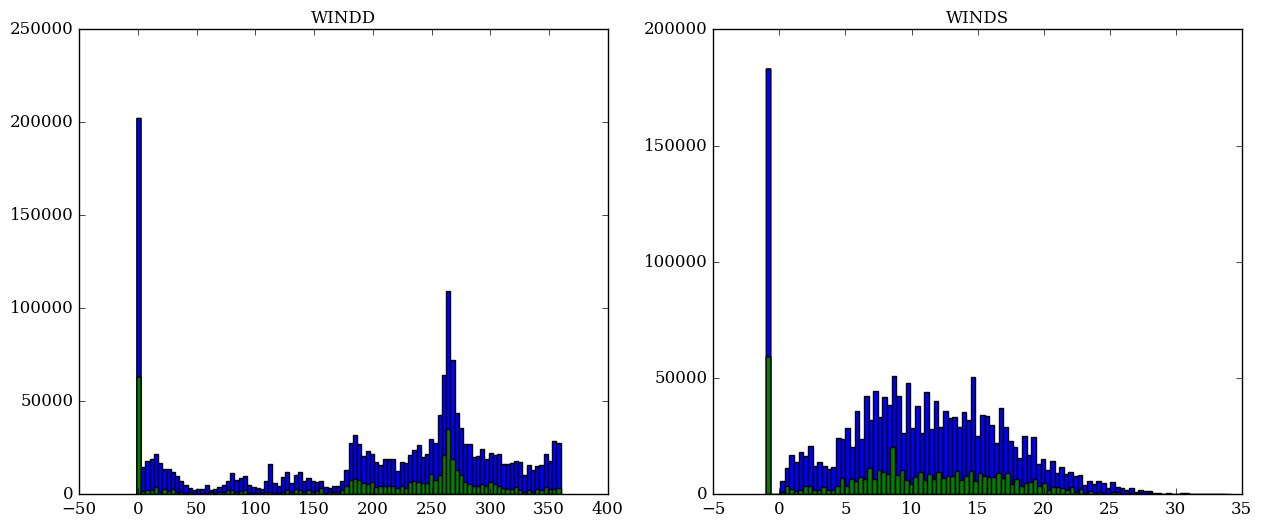

In [31]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plot_hist('WINDD')
plt.subplot(1,2,2)
plot_hist('WINDS')

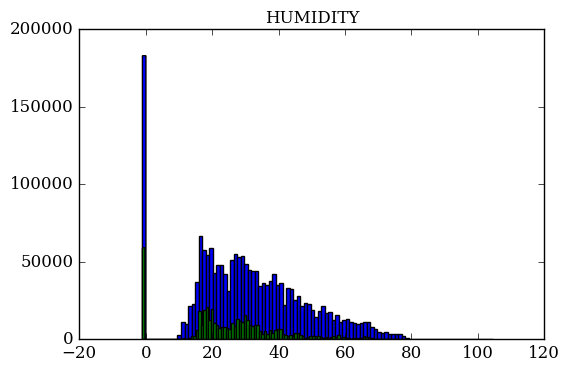

In [32]:
plot_hist('HUMIDITY')

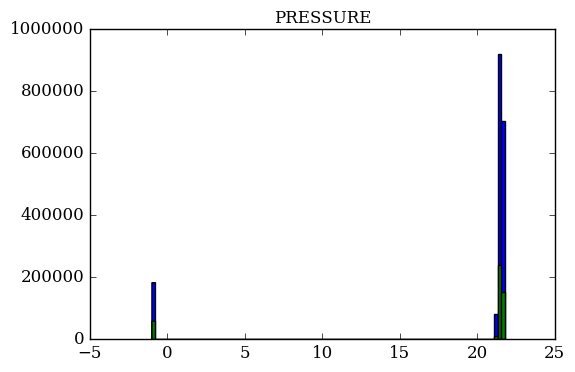

In [33]:
plot_hist('PRESSURE')

### Look at location of sky fibers on plate

In [34]:
def focal_rad(x,y):
    r = np.sqrt(x**2+y**2)
    return r

In [38]:
X = meta_rich['XFOCAL_x']
Y = meta_rich['YFOCAL_x']

In [39]:
r=[]
for i, x in enumerate(X):
    r.append(focal_rad(x,Y[i]))

In [40]:
rfocal = r

In [42]:
meta_rich['THROUGHPUT'] = meta_rich['THROUGHPUT']/65535.

In [43]:
plt.plot(X,Y)

OverflowError: In draw_path: Exceeded cell block limit